In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] ="0"

In [3]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [12]:
import numpy as np

In [4]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [8]:
train_labels[0]

15.2

In [9]:
# 数据标准化，归一化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean # 这个地方必须要使用训练数据集上计算得到的均值和方差
test_data /=std

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # loss 使用均方误差，监控使用平均绝对误差
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [10]:
# K折验证
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing flod #', i)
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)

processing flod # 0



processing flod # 1


processing flod # 2


processing flod # 3


In [11]:
all_scores

[2.1348371505737305, 2.677375316619873, 2.3609912395477295, 2.4253475666046143]

In [12]:
np.mean(all_scores)

2.399637818336487

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_historise = []

for i in range(k):
    print('processing flod #', i)
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=1, verbose=0)
#     print(history.history.keys())
    mae_history = history.history['mae']
    all_mae_historise.append(mae_history)
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)

processing flod # 0

processing flod # 1
processing flod # 2
processing flod # 3


In [14]:
average_mae_history = [np.mean([x[i] for x in all_mae_historise]) for i in range(num_epochs)]

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation MAE')

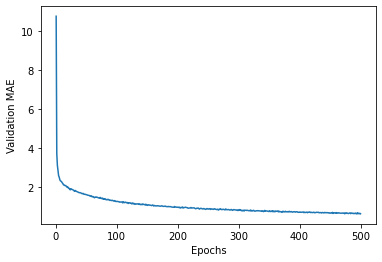

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

In [16]:
def smooth_curve(points, factor=0.9): 
    smoothed_points = [] 
    for point in points: 
        if smoothed_points: 
            previous = smoothed_points[-1] 
            smoothed_points.append(previous * factor + point * (1 - factor)) 
        else: 
            smoothed_points.append(point) 
    return smoothed_points

ValueError: x and y must have same first dimension, but have shapes (480,) and (490,)

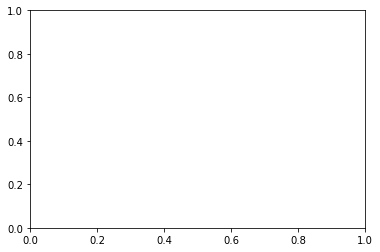

In [31]:
smooth_average_mae_history = smooth_curve(average_mae_history[10:])
plt.clf()
plt.plot(range(1, len(smooth_average_mae_history) + 1), smooth_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

In [19]:
smooth_average_mae_history

[2.2298152,
 2.2262999296188357,
 2.2164846491813663,
 2.2076095311641697,
 2.196330151152611,
 2.185989142529965,
 2.1757891187722684,
 2.1611296185542823,
 2.1487600668093276,
 2.1327009436923903,
 2.1192214343641975,
 2.1016246307219366,
 2.0846109713606804,
 2.0634056620740386,
 2.049223592246487,
 2.0366034600421017,
 2.0217105472043952,
 2.007797890063149,
 1.9935579894387923,
 1.978784721947092,
 1.9605216042903466,
 1.9484315624869528,
 1.936150530967414,
 1.9222347557484802,
 1.9085344868844476,
 1.8943955538820378,
 1.8806310807005602,
 1.8663217467966113,
 1.8522484042855294,
 1.8403187637280398,
 1.8285306493715323,
 1.816395038390983,
 1.8029257482512255,
 1.7905057334503645,
 1.7806897697092097,
 1.7688402298606336,
 1.7560923305317968,
 1.7457739061562905,
 1.734936184863629,
 1.7247439031425555,
 1.7142453018984294,
 1.7041100583220508,
 1.6932158400188375,
 1.683331006428941,
 1.674078637654791,
 1.6629088887231438,
 1.6534665735355218,
 1.6421748916916132,
 1.63431777

In [21]:
model = build_model()
history = model.fit(train_data, train_labels, epochs=500, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(test_data, test_labels)
test_mae

102/102 [==============================] - 0s 528us/step


2.4544830322265625

In [24]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [28]:
len(history.history['mae'])
history.history['mae']

500

[20.049585,
 15.26229,
 9.735083,
 6.100975,
 4.5236473,
 3.757084,
 3.3878775,
 3.180797,
 3.0166693,
 2.9294426,
 2.8168378,
 2.7202518,
 2.648726,
 2.595668,
 2.552109,
 2.4958365,
 2.447435,
 2.4026742,
 2.3801975,
 2.3119986,
 2.3231215,
 2.2814975,
 2.2736897,
 2.2654295,
 2.2209096,
 2.2298934,
 2.1907709,
 2.199948,
 2.1385703,
 2.114624,
 2.1443286,
 2.1150317,
 2.111598,
 2.069596,
 2.1060739,
 2.0702808,
 2.0512886,
 2.0904796,
 2.047841,
 2.0307665,
 2.0281992,
 2.013531,
 1.991735,
 1.9884136,
 1.9994429,
 1.9801602,
 1.9487879,
 1.9168522,
 1.921646,
 1.9560032,
 1.9059992,
 1.9330591,
 1.9178315,
 1.881654,
 1.8643317,
 1.8867689,
 1.8802518,
 1.8584522,
 1.8404338,
 1.8384774,
 1.8349433,
 1.8413917,
 1.8080412,
 1.8399292,
 1.8041242,
 1.7901282,
 1.7669637,
 1.7679197,
 1.7648458,
 1.7242533,
 1.7563132,
 1.6616503,
 1.7371888,
 1.7057133,
 1.7150327,
 1.6691958,
 1.7139981,
 1.6909645,
 1.7073866,
 1.6898423,
 1.6688931,
 1.6754239,
 1.6646763,
 1.6683401,
 1.628795,

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation MAE')

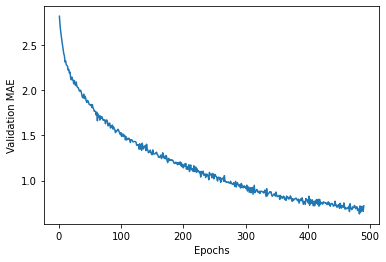

In [36]:
plt.clf()
plt.plot(range(1, len(history.history['mae']) - 9), history.history['mae'][10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')